# Predictive Modeling of Bike Rentals: A PyCaret Approach

In [1]:
import pycaret
print(pycaret.__version__)

3.3.2


### Dataset Loading with PyCaret

In [2]:
from pycaret.datasets import get_data

#here is the list of all available datasets
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [43]:
dataset = get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


### Splitting Data for Modeling and Prediction

This code splits the 'bike' dataset into training and testing data (95%) and unseen data (5%)

In [6]:
data = dataset.sample(frac=0.95, random_state=123)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (16510, 15)
Unseen Data For Predictions: (869, 15)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16510 entries, 0 to 16509
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     16510 non-null  int64  
 1   dteday      16510 non-null  object 
 2   season      16510 non-null  int64  
 3   yr          16510 non-null  int64  
 4   mnth        16510 non-null  int64  
 5   hr          16510 non-null  int64  
 6   holiday     16510 non-null  int64  
 7   weekday     16510 non-null  int64  
 8   workingday  16510 non-null  int64  
 9   weathersit  16510 non-null  int64  
 10  temp        16510 non-null  float64
 11  atemp       16510 non-null  float64
 12  hum         16510 non-null  float64
 13  windspeed   16510 non-null  float64
 14  cnt         16510 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 1.9+ MB


In [8]:
data.nunique()

instant       16510
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
cnt             865
dtype: int64

### Feature Classification in Bike Rental Dataset

In [9]:
categoricals = ['season', 'yr', 'mnth', 'hr','holiday', 'weekday','workingday','weathersit' ]
numericals   = ['temp', 'atemp', 'hum', 'windspeed']
ignore       = ['instant','dteday']

In [11]:
for col in categoricals:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'season': [3 4 2 1]
Unique values in 'yr': [0 1]
Unique values in 'mnth': [ 9 11 10  6  5  3  2 12  1  7  4  8]
Unique values in 'hr': [19 14 23  9  7 20  5 17  3 22  4 13  8 18 12 10  1 21  0  6 11 16  2 15]
Unique values in 'holiday': [0 1]
Unique values in 'weekday': [6 0 2 5 4 3 1]
Unique values in 'workingday': [0 1]
Unique values in 'weathersit': [1 2 3 4]


### Modeling and Tuning with PyCaret: CatBoost for Bike Rental Prediction

**Description:** This code sets up a PyCaret regression experiment without preprocessing, compares models to find CatBoost as the best performer, tunes it, and generates various plots, including SHAP plots for model interpretability.

In [12]:
from pycaret.regression import *

In [46]:
 #experience1 = no preprocessing
#exp1 = RegressionExperiment() 
from pycaret.regression import *

# Run setup
exp1 = setup(data=data, 
             ignore_features=ignore,  
             target='cnt', 
             session_id=555, 
             train_size=0.8, 
             preprocess=False, 
             categorical_features=categoricals, 
             numeric_features=numericals)


,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(16510, 15)"
4,Transformed data shape,"(16510, 13)"
5,Transformed train set shape,"(13208, 13)"
6,Transformed test set shape,"(3302, 13)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


In [26]:
top3_exp1 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.8433,1586.1428,39.7332,0.9520,0.4251,0.4216,1.3380
xgboost,Extreme Gradient Boosting,26.0434,1713.9584,41.2797,0.9481,0.4382,0.4182,0.0920
lightgbm,Light Gradient Boosting Machine,26.1033,1734.0221,41.5702,0.9474,0.4127,0.4106,9.1060
et,Extra Trees Regressor,25.4542,1783.5380,42.1377,0.9460,0.3407,0.3124,1.3150
rf,Random Forest Regressor,25.9500,1879.7448,43.2727,0.9430,0.3482,0.3202,1.3360
knn,K Neighbors Regressor,35.1511,3071.6288,55.3952,0.9069,0.4061,0.4229,0.0600
dt,Decision Tree Regressor,35.5801,3700.5676,60.6737,0.8880,0.4504,0.3834,0.0480
gbr,Gradient Boosting Regressor,48.9534,5167.6611,71.8702,0.8433,0.6987,0.9954,0.3810
ada,AdaBoost Regressor,85.9098,11213.3328,105.8532,0.6599,1.0560,2.7001,0.2350
ridge,Ridge Regression,106.7545,20351.9464,142.6251,0.3836,1.2092,3.3381,0.0270


In [27]:
top3_exp1

 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=555, ...),
 LGBMRegressor(n_jobs=-1, random_state=555)]

In [47]:
# Create the CatBoost model
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.1268,1650.0954,40.6214,0.9502,0.4221,0.4425
1,23.6970,1402.0275,37.4437,0.9584,0.3809,0.3533
2,23.8723,1388.0492,37.2565,0.9584,0.4248,0.4004
3,24.7815,1365.0161,36.9461,0.9556,0.4327,0.4348
4,23.3115,1427.4415,37.7815,0.9545,0.4195,0.4046
5,24.7586,1512.9954,38.8972,0.9541,0.4370,0.4361
6,23.9620,1497.0477,38.6917,0.9540,0.4621,0.4467
7,25.9186,1804.9753,42.4850,0.9512,0.4538,0.4644
8,27.4996,2112.2760,45.9595,0.9339,0.4240,0.4197


In [48]:
# Tune the CatBoost model
tune_catboost = tune_model(catboost)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.3644,1543.7192,39.2902,0.9534,0.4415,0.4295
1,23.3782,1365.5688,36.9536,0.9595,0.4086,0.3431
2,22.8754,1267.7119,35.6049,0.9620,0.4127,0.3601
3,23.9034,1299.7220,36.0517,0.9577,0.4521,0.4185
4,22.8265,1342.1513,36.6354,0.9572,0.4262,0.3803
5,23.8809,1476.3818,38.4237,0.9552,0.4414,0.4068
6,22.9394,1385.0773,37.2166,0.9575,0.4255,0.3844
7,25.0295,1721.3807,41.4895,0.9534,0.4477,0.4312
8,26.6150,1994.8768,44.6640,0.9376,0.4112,0.3737


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
# Access the parameters of the CatBoost model
tuned_params =catboost.get_params()
print(tuned_params)

{'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 555}


In [33]:
# Access the parameters of the tuned CatBoost model
tuned_params = tune_catboost.get_params()
print(tuned_params)


{'depth': 9, 'l2_leaf_reg': 4, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.1, 'task_type': 'CPU', 'n_estimators': 130, 'random_state': 555, 'eta': 0.3}


In [36]:
#evaluate_model(tune_catboost)

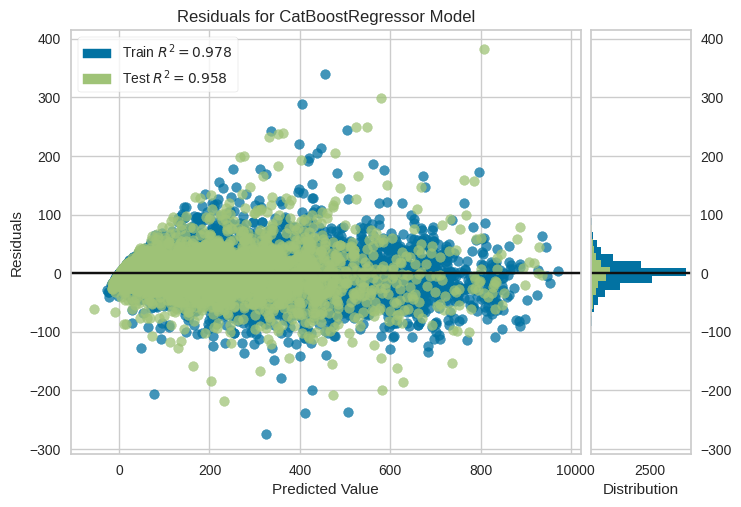

In [50]:
plot_model(tune_catboost)

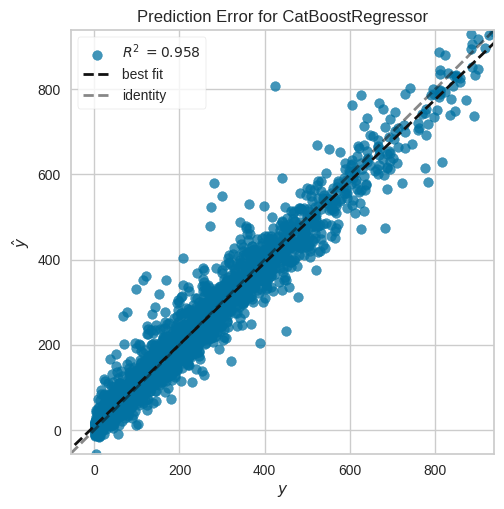

In [49]:
# Plot the error for the tuned CatBoost model
plot_model(tune_catboost, plot='error')

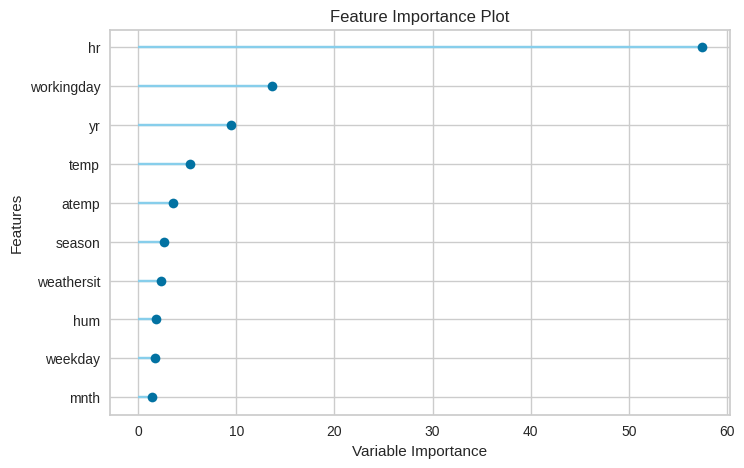

In [53]:
plot_model(tune_catboost, plot='feature')


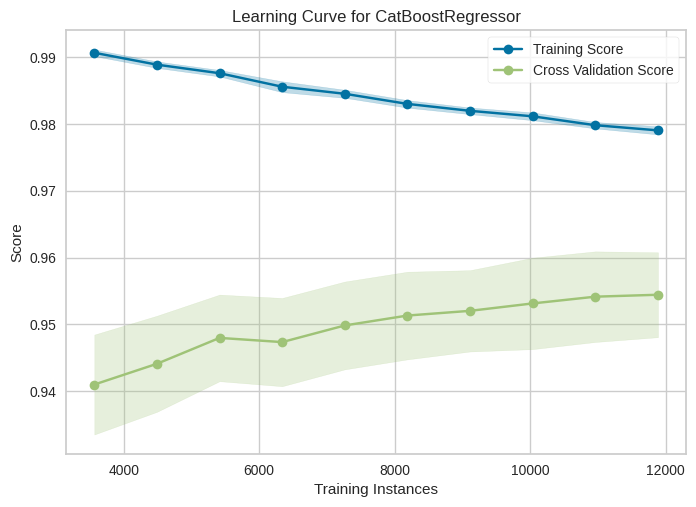

In [54]:
plot_model(tune_catboost, plot='learning')


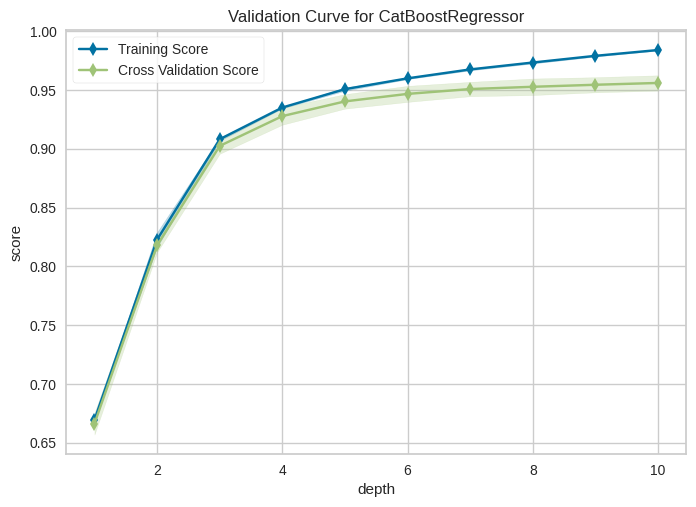

In [55]:
plot_model(tune_catboost, plot='vc')


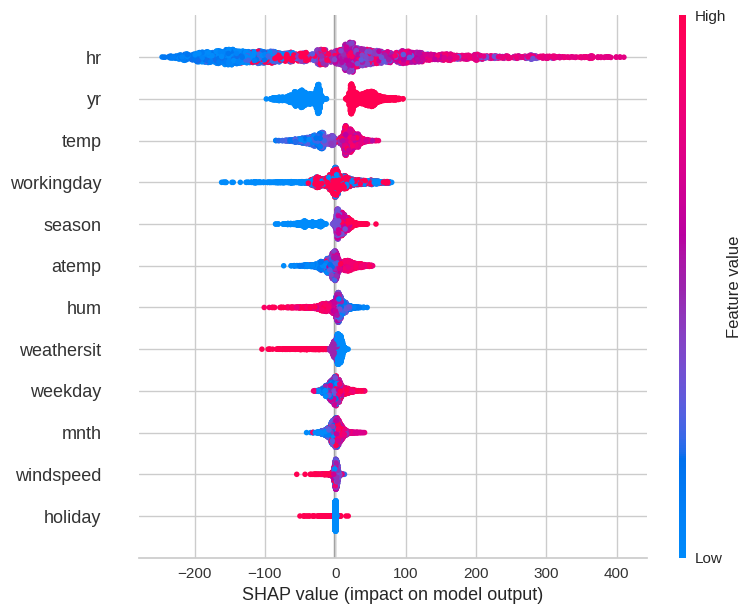

In [60]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(tune_catboost)

# Calculate SHAP values
shap_values = explainer.shap_values(exp1.get_config('X_test'))

# Create SHAP summary plot
shap.summary_plot(shap_values, exp1.get_config('X_test'))


### experiment 2,PyCaret Regression Setup with Preprocessing"

**Description:** This code sets up a second PyCaret regression experiment with preprocessing, including normalization and outlier removal, using the 'bike' dataset, and configures features, target variable.
Although CatBoost remains the top model, its performance is slightly less compareing it with experiment1

In [62]:
#exp2 = RegressionExperiment() 
exp2=setup(data, ignore_features=ignore, target='cnt', session_id=555, train_size=0.8, categorical_features= categoricals,
           numeric_features=numericals,preprocess=True, normalize=True , remove_outliers=True, ordinal_features=None)

,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(16510, 15)"
4,Transformed data shape,"(15849, 59)"
5,Transformed train set shape,"(12547, 59)"
6,Transformed test set shape,"(3302, 59)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


In [17]:
exp2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,27.9665,1908.5801,43.5830,0.9422,0.5139,0.5881,1.7900
lightgbm,Light Gradient Boosting Machine,31.5828,2261.1482,47.4830,0.9315,0.5559,0.6825,3.1710
et,Extra Trees Regressor,28.4108,2298.7933,47.8453,0.9305,0.3894,0.3793,6.6190
xgboost,Extreme Gradient Boosting,31.3010,2382.0223,48.7152,0.9278,0.5354,0.6149,0.5970
rf,Random Forest Regressor,32.5625,2732.2959,52.1716,0.9173,0.4739,0.5467,4.9870
dt,Decision Tree Regressor,43.2821,5413.4614,73.3921,0.8363,0.5625,0.5658,0.2900
knn,K Neighbors Regressor,52.9513,6459.6531,80.3319,0.8043,0.5183,0.5994,0.3520
gbr,Gradient Boosting Regressor,59.5250,6861.6287,82.8064,0.7920,0.8026,1.4634,0.8940
ridge,Ridge Regression,75.5272,10433.5368,102.1278,0.6838,1.0328,2.9466,0.3200
br,Bayesian Ridge,75.5033,10431.5977,102.1183,0.6838,1.0321,2.9387,0.2900


In [64]:
# Create the CatBoost model
catboost2 = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.8532,2064.5242,45.4370,0.9377,0.5096,0.6115
1,27.2926,1700.7579,41.2402,0.9495,0.4860,0.4879
2,26.7699,1643.2193,40.5366,0.9508,0.5124,0.5560
3,27.5944,1629.8708,40.3717,0.9470,0.5162,0.5989
4,26.5986,1774.7138,42.1274,0.9434,0.4992,0.5754
5,27.7054,1835.5498,42.8433,0.9443,0.5255,0.6233
6,26.7433,1762.0605,41.9769,0.9459,0.5183,0.5993
7,29.3038,2191.4186,46.8126,0.9407,0.5450,0.6291
8,30.8131,2541.0705,50.4090,0.9205,0.5327,0.6064


In [66]:
# Tune the CatBoost model
tune_catboost2 = tune_model(catboost2)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.3131,1939.5648,44.0405,0.9415,0.5098,0.5981
1,27.4249,1707.5408,41.3224,0.9493,0.4891,0.4976
2,26.3644,1568.6373,39.6060,0.9530,0.5198,0.5677
3,27.9078,1645.7405,40.5677,0.9465,0.5234,0.5856
4,26.4034,1828.8920,42.7655,0.9417,0.5095,0.5840
5,27.4078,1777.9695,42.1660,0.9461,0.5104,0.5800
6,26.5876,1721.6661,41.4930,0.9471,0.5323,0.6152
7,29.5144,2186.0589,46.7553,0.9409,0.5463,0.6717
8,31.3490,2586.3310,50.8560,0.9191,0.5333,0.6046


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [67]:
# Access the parameters of the tuned CatBoost model
tuned_params =catboost2.get_params()
print(tuned_params)

{'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 555}


In [68]:
# Access the parameters of the tuned CatBoost model
tuned_params = tune_catboost2.get_params()
print(tuned_params)


{'depth': 9, 'l2_leaf_reg': 4, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.1, 'task_type': 'CPU', 'n_estimators': 130, 'random_state': 555, 'eta': 0.3}


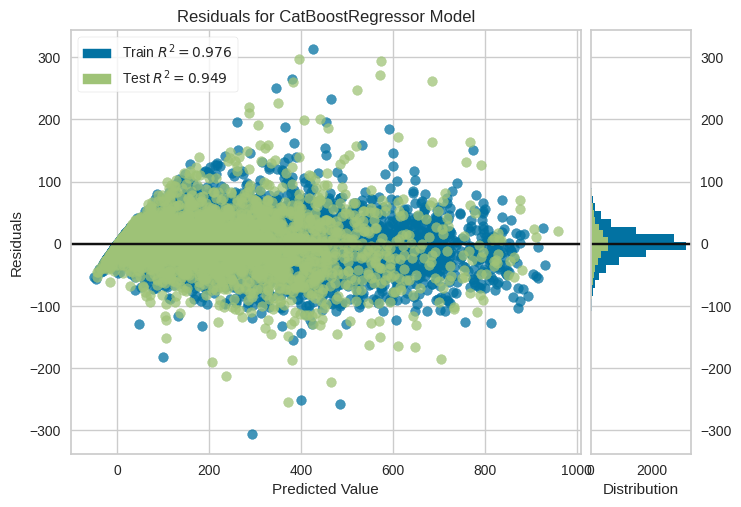

In [69]:
plot_model(tune_catboost2)

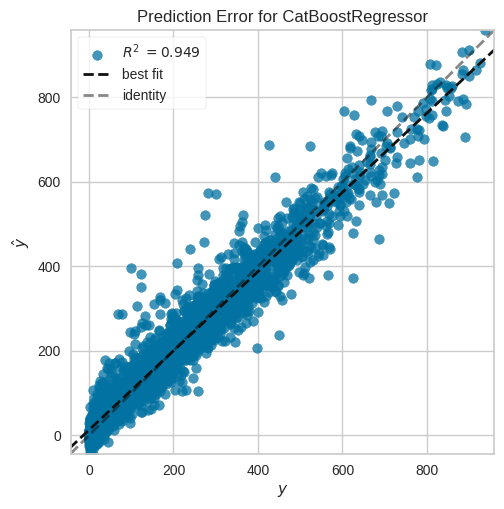

In [70]:
# Plot the error for the tuned CatBoost model
plot_model(tune_catboost2, plot='error')

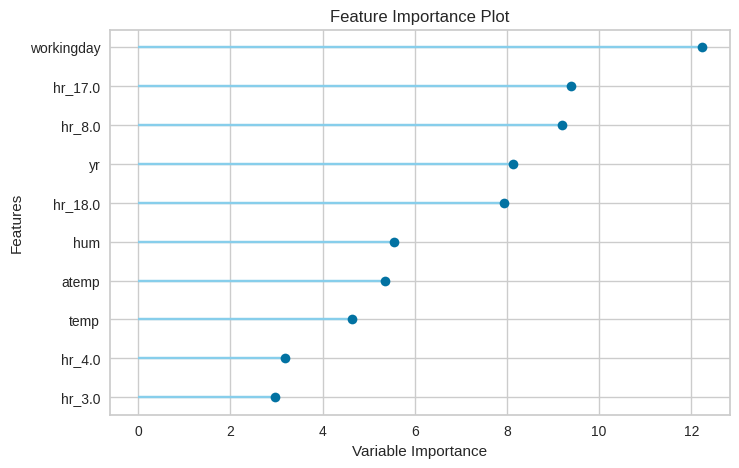

In [71]:
plot_model(tune_catboost2, plot='feature')


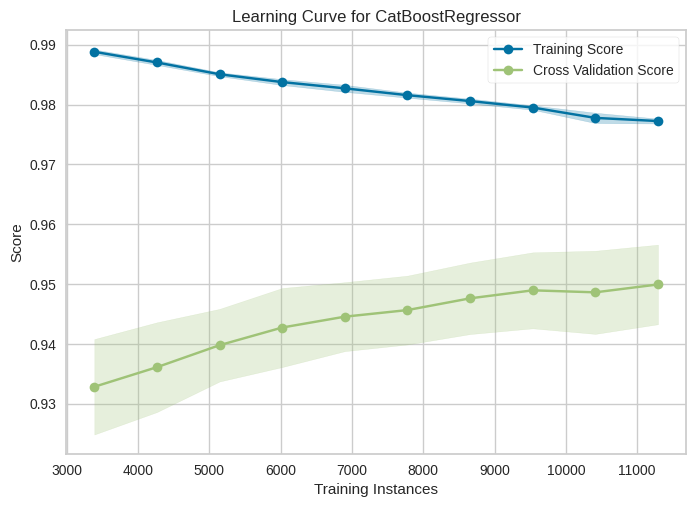

In [73]:
plot_model(tune_catboost2, plot='learning')


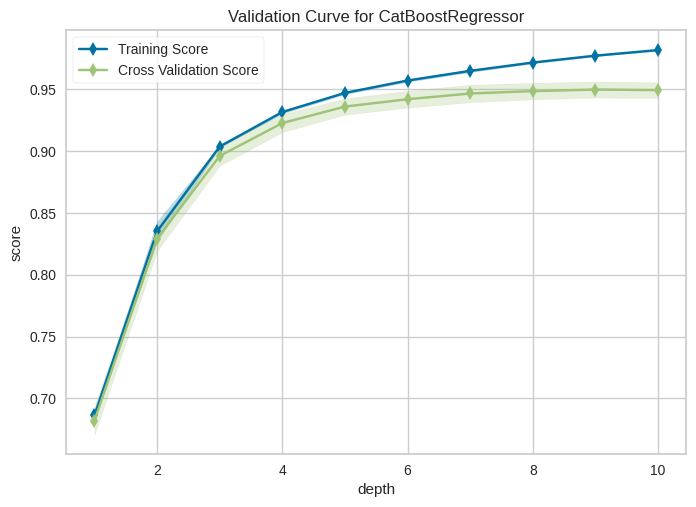

In [74]:
plot_model(tune_catboost2, plot='vc')

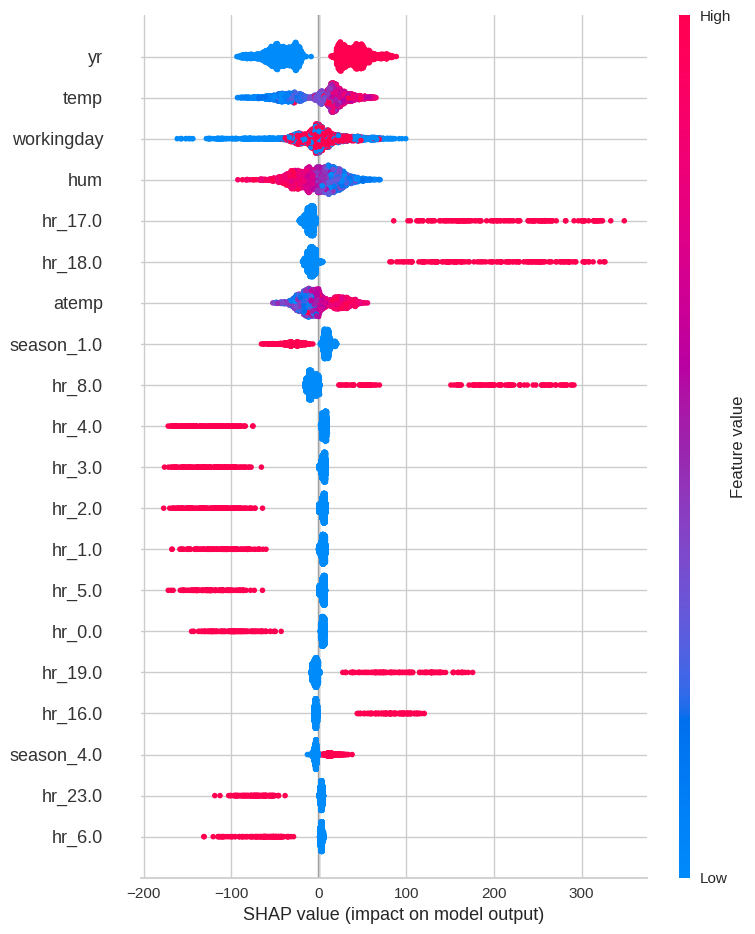

In [81]:
# Retrieve the transformed dataset
X_test_transformed = exp2.get_config('X_test_transformed')

# Initialize the SHAP explainer
explainer2 = shap.TreeExplainer(tune_catboost2)

# Calculate SHAP values using the transformed data
shap_values2 = explainer2.shap_values(X_test_transformed)

# Create SHAP summary plot
shap.summary_plot(shap_values2, X_test_transformed)



# Blending Top Models: CatBoost, XGBoost, and LGBMRegressor

**Description:** This code blends the top three models from the first PyCaret experiment—CatBoost, XGBoost, and LGBMRegressor—to leverage their combined predictive power for improved performance.

In [83]:
top3_exp1

 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=555, ...),
 LGBMRegressor(n_jobs=-1, random_state=555)]

In [84]:
blender = exp1.blend_models(estimator_list = top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.2404,1609.5456,40.1191,0.9514,0.3758,0.3802
1,23.1160,1358.4474,36.8571,0.9597,0.3713,0.3088
2,23.3523,1357.6339,36.8461,0.9593,0.3930,0.3537
3,24.3584,1344.4364,36.6666,0.9563,0.3791,0.3692
4,22.8311,1336.6231,36.5599,0.9574,0.3834,0.3534
5,24.3234,1472.1758,38.3689,0.9554,0.4057,0.3905
6,23.1021,1424.3068,37.7400,0.9563,0.4006,0.3832
7,24.9988,1705.0821,41.2926,0.9539,0.4118,0.3966
8,26.3175,2087.4909,45.6891,0.9347,0.3880,0.3522


In [85]:
blender


VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7ba6e8a675b0>),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=555, ...)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=555))],
                n_jobs=-1)

# Stacking Top Models: CatBoost, XGBoost, and LGBMRegressor

**Description:** This code stacks the top three models from the first PyCaret experiment—CatBoost, XGBoost, and LGBMRegressor—to create an ensemble model for enhanced predictive accuracy.

In [86]:
stacker = exp1.stack_models(estimator_list=top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.1814,1592.4397,39.9054,0.9520,0.3975,0.3911
1,22.9745,1342.5050,36.6402,0.9601,0.3786,0.3062
2,23.2597,1357.0973,36.8388,0.9594,0.3932,0.3520
3,24.2227,1332.0866,36.4978,0.9567,0.4026,0.3762
4,22.6879,1332.2380,36.4998,0.9575,0.3746,0.3563
5,24.1251,1465.0565,38.2761,0.9556,0.4090,0.3777
6,23.0206,1426.5628,37.7699,0.9562,0.4127,0.3871
7,24.9408,1699.2711,41.2222,0.9540,0.4333,0.4116
8,26.4999,2073.4873,45.5356,0.9351,0.3988,0.3754


In [87]:
stacker

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7ba6ea6605e0>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=555, ...)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=555))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

# Stacking with XGBoost as Meta-Model

**Description:** This code stacks the top three models from the first PyCaret experiment using XGBoost as the meta-model to potentially improve ensemble performance.

In [88]:
xgboost = exp1.create_model('xgboost')
stacker_xgboost = exp1.stack_models(top3_exp1, meta_model = xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.5679,1858.8486,43.1144,0.9439,0.4272,0.4496
1,24.5000,1501.5758,38.7502,0.9554,0.3910,0.3364
2,25.1771,1511.4169,38.8769,0.9547,0.4509,0.4248
3,25.7988,1491.1910,38.6159,0.9515,0.4281,0.4112
4,24.1205,1406.4263,37.5024,0.9551,0.4425,0.3966
5,25.9071,1605.3676,40.0670,0.9513,0.4405,0.4288
6,25.0880,1585.8954,39.8233,0.9513,0.4575,0.4720
7,27.2996,1923.9413,43.8628,0.9480,0.4838,0.4338
8,28.4022,2286.4657,47.8170,0.9284,0.4349,0.4007


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.7835,1627.9939,40.3484,0.9509,0.3470,0.3306
1,23.8288,1452.2471,38.1084,0.9569,0.3388,0.2909
2,24.2284,1517.6258,38.9567,0.9546,0.3490,0.3123
3,24.8599,1504.0473,38.7820,0.9511,0.3568,0.3354
4,23.6084,1466.8666,38.2997,0.9532,0.3416,0.3099
5,25.7221,1697.5631,41.2015,0.9485,0.3720,0.3486
6,24.3060,1592.4653,39.9057,0.9511,0.3589,0.3291
7,26.1516,1921.6050,43.8361,0.9480,0.3714,0.3429
8,28.0140,2438.6554,49.3827,0.9237,0.3557,0.3165


In [89]:
stacker_xgboost

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7ba6ea5eb2e0>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=-1,
                                               num_parallel_tree=None,
                                               random_state=555, ...),
                  n_jobs=-1)

# The best model is the tuned CatBoost from the first experiment
### Final Model Training and Unseen Data Prediction

**Description:** This code finalizes the tuned CatBoost model from the first PyCaret experiment, applies it to unseen data, and displays the last few predictions.

In [93]:
final_model = exp1.finalize_model(tune_catboost)

In [94]:
final_model 


Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7ba6ea660910>)])

In [95]:
unseen_predictions = exp1.predict_model(final_model , data=data_unseen)
unseen_predictions.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,24.1757,1598.5066,39.9813,0.9476,0.4343,0.4114


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
864,17323,12/29/2012,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0000,129,152.534403
865,17335,12/30/2012,1,1,12,3,0,0,0,2,0.26,0.2273,0.56,0.4179,15,11.432389
866,17344,12/30/2012,1,1,12,12,0,0,0,1,0.28,0.2273,0.36,0.5821,144,156.848787
867,17346,12/30/2012,1,1,12,14,0,0,0,1,0.30,0.2727,0.36,0.4627,160,138.201925
868,17373,12/31/2012,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,164,295.525590


In [96]:
#exp1.save_model(final_model, 'my_pycaret_regression')

In [97]:
#my_winning_regressor = load_model('my_pycaret_regression')